In [2]:
import sys
import os
from pathlib import Path
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from evaluation.prep_datasets import extract_features_not_normalised
from evaluation.evaluate_mimic import evaluate_mimic, evaluate_random
import torch

## Different sets of weights

In [3]:
def load_linear_models(folder_path, num_features):
    models = []
    for path in os.listdir(folder_path):
        if path.endswith('.pt'):
            with open(os.path.join(folder_path, path), 'rb') as f:
                model = torch.nn.Linear(num_features, 1)
                loaded_state_dict = torch.load(f)
                model.load_state_dict(loaded_state_dict)
                models.append(model)
    return models

In [27]:
# Load Models
num_features = 92

# for each file, load the model
models1 = load_linear_models('..\..\datasets\\1000_ablations\weights\set1\\100\\results_sidebysideLM\80\saved_models', num_features)
models2 = load_linear_models('..\..\datasets\\1000_ablations\weights\set2\\100\\results_sidebysideLM\80\saved_models', num_features)
models3 = load_linear_models('..\..\datasets\\1000_ablations\weights\set3\\100\\results_sidebysideLM\80\saved_models', num_features)
models4 = load_linear_models('..\..\datasets\\1000_ablations\weights\set4\\100\\results_sidebysideLM\80\saved_models', num_features)
models5 = load_linear_models('..\..\datasets\\1000_ablations\weights\set5\\100\\results_sidebysideLM\80\saved_models', num_features)

In [28]:
# load the test sets
with open('..\..\datasets\\1000_ablations\weights\set1\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_set1, test_labels1 = pkl.load(f)

with open('..\..\datasets\\1000_ablations\weights\set1\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_set2, test_labels2 = pkl.load(f)

with open('..\..\datasets\\1000_ablations\weights\set1\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_set3, test_labels3 = pkl.load(f)

with open('..\..\datasets\\1000_ablations\weights\set1\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_set4, test_labels4 = pkl.load(f)

with open('..\..\datasets\\1000_ablations\weights\set1\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_set5, test_labels5 = pkl.load(f)

with open('..\..\datasets\\1000_ablations\weights\combined_test_set.pkl', 'rb') as f:
    combined_test_set, combined_test_labels = pkl.load(f)

In [29]:
def test(models, test, labels):
    test_losses_random, test_mean_errors_random, test_rmses_random, r2s_random, pearson_correlations_random, spearman_correlations_random = [], [], [], [], [], []
    for model in models:
        test_loss, test_mean_error, test_rmse, r2, pearson_correlation, spearman_correlation, pred_label_pairs = evaluate_mimic(model, test, labels, worst=False, best=False, features=['citizens_saved', 'unsaved_citizens', 'distance_to_citizen', 'standing_on_extinguisher', 'length', 'could_have_saved', 'final_number_of_unsaved_citizens', 'moved_towards_closest_citizen'])
        test_losses_random.append(test_loss)
        test_mean_errors_random.append(test_mean_error)
        test_rmses_random.append(test_rmse)
        r2s_random.append(r2)
        pearson_correlations_random.append(pearson_correlation)
        spearman_correlations_random.append(spearman_correlation)

    return test_losses_random, test_mean_errors_random, test_rmses_random, r2s_random, pearson_correlations_random, spearman_correlations_random

In [30]:
# make predictions on own data
test_losses1, test_mean_errors1, test_rmses1, r2s1, pearson_correlations1, spearman_correlations1 = test(models1, test_set1, test_labels1)
test_losses2, test_mean_errors2, test_rmses2, r2s2, pearson_correlations2, spearman_correlations2 = test(models2, test_set2, test_labels2)
test_losses3, test_mean_errors3, test_rmses3, r2s3, pearson_correlations3, spearman_correlations3 = test(models3, test_set3, test_labels3)
test_losses4, test_mean_errors4, test_rmses4, r2s4, pearson_correlations4, spearman_correlations4 = test(models4, test_set4, test_labels4)
test_losses5, test_mean_errors5, test_rmses5, r2s5, pearson_correlations5, spearman_correlations5 = test(models5, test_set5, test_labels5)

# make predictions on combined data
test_losses_combined1, test_mean_errors_combined1, test_rmses_combined1, r2s_combined1, pearson_correlations_combined1, spearman_correlations_combined1 = test(models1, combined_test_set, combined_test_labels)
test_losses_combined2, test_mean_errors_combined2, test_rmses_combined2, r2s_combined2, pearson_correlations_combined2, spearman_correlations_combined2 = test(models2, combined_test_set, combined_test_labels)
test_losses_combined3, test_mean_errors_combined3, test_rmses_combined3, r2s_combined3, pearson_correlations_combined3, spearman_correlations_combined3 = test(models3, combined_test_set, combined_test_labels)
test_losses_combined4, test_mean_errors_combined4, test_rmses_combined4, r2s_combined4, pearson_correlations_combined4, spearman_correlations_combined4 = test(models4, combined_test_set, combined_test_labels)
test_losses_combined5, test_mean_errors_combined5, test_rmses_combined5, r2s_combined5, pearson_correlations_combined5, spearman_correlations_combined5 = test(models5, combined_test_set, combined_test_labels)

In [31]:
def round_table(table):
    table_rounded = []
    for row in table:
        rounded_row = []
        for val in row:
            if isinstance(val, float):
                rounded_row.append(round(val, 2))
            else:
                rounded_row.append(val)
        table_rounded.append(rounded_row)

In [9]:
# Show results in a table
# Show the performance of the models in a table with the models as columns and measures as rows
table = [
    ['measures'] + ['Set 1'] + ['Set 2'] + ['Set 3'] + ['Set 4'] + ['Set 5'],
    ['rmse'] + [np.mean(test_rmses1)] + [np.mean(test_rmses2)] + [np.mean(test_rmses3)] + [np.mean(test_rmses4)] + [np.mean(test_rmses5)],
    ['r2'] + [np.mean(r2s1)] + [np.mean(r2s2)] + [np.mean(r2s3)] + [np.mean(r2s4)] + [np.mean(r2s5)],
    ['spearman'] + [np.mean(spearman_correlations1)] + [np.mean(spearman_correlations2)] + [np.mean(spearman_correlations3)] + [np.mean(spearman_correlations4)] + [np.mean(spearman_correlations5)],
    ['------'] + ['------'] + ['------'] + ['------'] + ['------'] + ['------'] + ['------'],
    ['rmse combined'] + [np.mean(test_rmses_combined1)] + [np.mean(test_rmses_combined2)] + [np.mean(test_rmses_combined3)] + [np.mean(test_rmses_combined4)] + [np.mean(test_rmses_combined5)],
    ['r2 combined'] + [np.mean(r2s_combined1)] + [np.mean(r2s_combined2)] + [np.mean(r2s_combined3)] + [np.mean(r2s_combined4)] + [np.mean(r2s_combined5)],
    ['spearman combined'] + [np.mean(spearman_correlations_combined1)] + [np.mean(spearman_correlations_combined2)] + [np.mean(spearman_correlations_combined3)] + [np.mean(spearman_correlations_combined4)] + [np.mean(spearman_correlations_combined5)],
]

table_rounded = []
for row in table:
    rounded_row = []
    for val in row:
        if isinstance(val, float):
            rounded_row.append(round(val, 2))
        else:
            rounded_row.append(val)
    table_rounded.append(rounded_row)

print(tabulate(table_rounded, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lllllll}
\hline
 measures          & Set 1   & Set 2   & Set 3   & Set 4   & Set 5   \\
\hline
 rmse              & 2.95    & 1.74    & 3.16    & 1.74    & 3.57    \\
 r2                & 0.27    & 0.75    & 0.16    & 0.75    & -0.07   \\
 spearman          & 0.63    & 0.69    & 0.57    & 0.79    & 0.61    \\
 ------            & ------  & ------  & ------  & ------  & ------  \\
 rmse combined     & 3.3     & 3.43    & 3.91    & 2.43    & 4.93    \\
 r2 combined       & 0.18    & 0.11    & -0.15   & 0.56    & -0.84   \\
 spearman combined & 0.67    & 0.69    & 0.36    & 0.78    & 0.62    \\
\hline
\end{tabular}


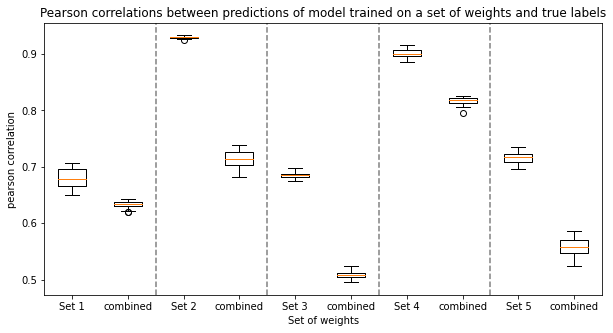

In [17]:
# Make a boxplot of the pearson correlations and pearson correlations combined
plt.figure(figsize=(10,5))
plt.boxplot([pearson_correlations1, pearson_correlations_combined1, pearson_correlations2, pearson_correlations_combined2, pearson_correlations3, pearson_correlations_combined3, pearson_correlations4, pearson_correlations_combined4, pearson_correlations5, pearson_correlations_combined5])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Set 1', 'combined', 'Set 2', 'combined', 'Set 3', 'combined', 'Set 4', 'combined', 'Set 5', 'combined'])
plt.ylabel('pearson correlation')
plt.xlabel('Set of weights')

for x in np.arange(2.5, 10, 2):
    plt.axvline(x,color='grey', ls='--')
plt.title('Pearson correlations between predictions of model trained on a set of weights and true labels')
plt.show()

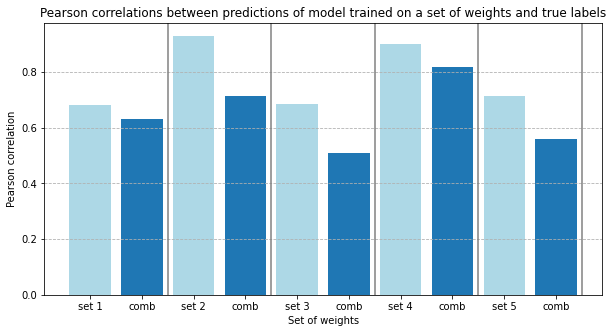

In [36]:
# plot with points
plt.figure(figsize=(10,5))
x = np.arange(1, 11)
plt.bar(x, [np.mean(pearson_correlations1), np.mean(pearson_correlations_combined1), np.mean(pearson_correlations2), np.mean(pearson_correlations_combined2), np.mean(pearson_correlations3), np.mean(pearson_correlations_combined3), np.mean(pearson_correlations4), np.mean(pearson_correlations_combined4), np.mean(pearson_correlations5), np.mean(pearson_correlations_combined5)])
# make every second bar light blue
for i in np.arange(1, 11, 2):
    plt.bar(i, [np.mean(pearson_correlations1), np.mean(pearson_correlations_combined1), np.mean(pearson_correlations2), np.mean(pearson_correlations_combined2), np.mean(pearson_correlations3), np.mean(pearson_correlations_combined3), np.mean(pearson_correlations4), np.mean(pearson_correlations_combined4), np.mean(pearson_correlations5), np.mean(pearson_correlations_combined5)][i-1], color='lightblue')
# plt.scatter(np.ones(len(pearson_correlationsval)), pearson_correlationsval, label='validity')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['set 1', 'comb', 'set 2', 'comb', 'set 3', 'comb', 'set 4', 'comb', 'set 5', 'comb'])
plt.ylabel('Pearson correlation')
plt.xlabel('Set of weights')
plt.title('Pearson correlations between predictions of model trained on a set of weights and true labels')
for x in np.arange(2.5, 12, 2):
    plt.axvline(x,color='grey', ls='-')
# add girdlines
plt.grid(axis='y', ls='--')
plt.show()

## Only one

In [16]:
# load the models
modelsval = load_linear_models('..\..\datasets\\1000_ablations\only_one\only_validity\\100\\results_sidebysideLM\80\saved_models', num_features)
modelsprox = load_linear_models('..\..\datasets\\1000_ablations\only_one\only_proximity\\100\\results_sidebysideLM\80\saved_models', num_features)
modelsdiv = load_linear_models('..\..\datasets\\1000_ablations\only_one\only_diversity\\100\\results_sidebysideLM\80\saved_models', num_features)
modelscrit = load_linear_models('..\..\datasets\\1000_ablations\only_one\only_critical\\100\\results_sidebysideLM\80\saved_models', num_features)
modelsreal = load_linear_models('..\..\datasets\\1000_ablations\only_one\only_realisticness\\100\\results_sidebysideLM\80\saved_models', num_features)
modelsspar = load_linear_models('..\..\datasets\\1000_ablations\only_one\only_sparsity\\100\\results_sidebysideLM\80\saved_models', num_features)

In [17]:
# load the test sets
with open('..\..\datasets\\1000_ablations\only_one\only_validity\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setval, test_labelsval = pkl.load(f)

with open('..\..\datasets\\1000_ablations\only_one\only_proximity\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setprox, test_labelsprox = pkl.load(f)

with open('..\..\datasets\\1000_ablations\only_one\only_diversity\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setdiv, test_labelsdiv = pkl.load(f)

with open('..\..\datasets\\1000_ablations\only_one\only_critical\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setcrit, test_labelscrit = pkl.load(f)

with open('..\..\datasets\\1000_ablations\only_one\only_realisticness\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setreal, test_labelsreal = pkl.load(f)

with open('..\..\datasets\\1000_ablations\only_one\only_sparsity\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setspar, test_labelsspar = pkl.load(f)

with open('..\..\datasets\\1000_ablations\only_one\combined_test_set.pkl', 'rb') as f:
    combined_test_set, combined_test_labels = pkl.load(f)

In [18]:
# make predictions on own data
test_lossesval, test_mean_errorsval, test_rmsesval, r2sval, pearson_correlationsval_oo, spearman_correlationsval = test(modelsval, test_setval, test_labelsval)
test_lossesprox, test_mean_errorsprox, test_rmsesprox, r2sprox, pearson_correlationsprox_oo, spearman_correlationsprox = test(modelsprox, test_setprox, test_labelsprox)
test_lossesdiv, test_mean_errorsdiv, test_rmsesdiv, r2sdiv, pearson_correlationsdiv_oo, spearman_correlationsdiv = test(modelsdiv, test_setdiv, test_labelsdiv)
test_lossescrit, test_mean_errorscrit, test_rmsecrit, r2scrit, pearson_correlationscrit_oo, spearman_correlationscrit = test(modelscrit, test_setcrit, test_labelscrit)
test_lossesreal, test_mean_errorsreal, test_rmsesreal, r2sreal, pearson_correlationsreal_oo, spearman_correlationsreal = test(modelsreal, test_setreal, test_labelsreal)
test_lossesspar, test_mean_errorsspar, test_rmsesspar, r2sspar, pearson_correlationsspar_oo, spearman_correlationsspar = test(modelsspar, test_setspar, test_labelsspar)

# make predictions on combined data
test_losses_combinedval, test_mean_errors_combinedval, test_rmses_combinedval, r2s_combinedval, pearson_correlations_combinedval_oo, spearman_correlations_combinedval = test(modelsval, combined_test_set, combined_test_labels)
test_losses_combinedprox, test_mean_errors_combinedprox, test_rmses_combinedprox, r2s_combinedprox, pearson_correlations_combinedprox_oo, spearman_correlations_combinedprox = test(modelsprox, combined_test_set, combined_test_labels)
test_losses_combineddiv, test_mean_errors_combineddiv, test_rmses_combineddiv, r2s_combineddiv, pearson_correlations_combineddiv_oo, spearman_correlations_combineddiv = test(modelsdiv, combined_test_set, combined_test_labels)
test_losses_combinedcrit, test_mean_errors_combinedcrit, test_rmses_combinedcrit, r2s_combinedcrit, pearson_correlations_combinedcrit_oo, spearman_correlations_combinedcrit = test(modelscrit, combined_test_set, combined_test_labels)
test_losses_combinedreal, test_mean_errors_combinedreal, test_rmses_combinedreal, r2s_combinedreal, pearson_correlations_combinedreal_oo, spearman_correlations_combinedreal = test(modelsreal, combined_test_set, combined_test_labels)
test_losses_combinedspar, test_mean_errors_combinedspar, test_rmses_combinedspar, r2s_combinedspar, pearson_correlations_combinedspar_oo, spearman_correlations_combinedspar = test(modelsspar, combined_test_set, combined_test_labels)

In [15]:
# Show results in a table
table = [
    ['measures'] + ['Only validity'] + ['Only proximity'] + ['Only diversity'] + ['Only critical'] + ['Only realisticness'] + ['Only sparsity'],
    ['rmse'] + [np.mean(test_rmsesval)] + [np.mean(test_rmsesprox)] + [np.mean(test_rmsesdiv)] + [np.mean(test_rmsecrit)] + [np.mean(test_rmsesreal)] + [np.mean(test_rmsesspar)],
    ['r2'] + [np.mean(r2sval)] + [np.mean(r2sprox)] + [np.mean(r2sdiv)] + [np.mean(r2scrit)] + [np.mean(r2sreal)] + [np.mean(r2sspar)],
    ['spearman'] + [np.mean(spearman_correlationsval)] + [np.mean(spearman_correlationsprox)] + [np.mean(spearman_correlationsdiv)] + [np.mean(spearman_correlationscrit)] + [np.mean(spearman_correlationsreal)] + [np.mean(spearman_correlationsspar)],
    ['------'] + ['------'] + ['------'] + ['------'] + ['------'] + ['------'] + ['------'],
    ['rmse combined'] + [np.mean(test_rmses_combinedval)] + [np.mean(test_rmses_combinedprox)] + [np.mean(test_rmses_combineddiv)] + [np.mean(test_rmses_combinedcrit)] + [np.mean(test_rmses_combinedreal)] + [np.mean(test_rmses_combinedspar)],
    ['r2 combined'] + [np.mean(r2s_combinedval)] + [np.mean(r2s_combinedprox)] + [np.mean(r2s_combineddiv)] + [np.mean(r2s_combinedcrit)] + [np.mean(r2s_combinedreal)] + [np.mean(r2s_combinedspar)],
    ['spearman combined'] + [np.mean(spearman_correlations_combinedval)] + [np.mean(spearman_correlations_combinedprox)] + [np.mean(spearman_correlations_combineddiv)] + [np.mean(spearman_correlations_combinedcrit)] + [np.mean(spearman_correlations_combinedreal)] + [np.mean(spearman_correlations_combinedspar)],
]

table_rounded = []
for row in table:
    rounded_row = []
    for val in row:
        if isinstance(val, float):
            rounded_row.append(round(val, 2))
        else:
            rounded_row.append(val)
    table_rounded.append(rounded_row)

print(tabulate(table_rounded, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lllllll}
\hline
 measures          & Only validity   & Only proximity   & Only diversity   & Only critical   & Only realisticness   & Only sparsity   \\
\hline
 rmse              & 3.39            & 0.39             & 2.36             & 3.13            & 2.19                 & 0.69            \\
 r2                & -0.31           & 0.11             & -1.74            & -5.66           & -2.67                & -1.9            \\
 spearman          & 0.23            & 0.33             & -0.03            & 0.03            & 0.0                  & 0.62            \\
 ------            & ------          & ------           & ------           & ------          & ------               & ------          \\
 rmse combined     & 3.35            & 1.76             & 2.94             & 3.57            & 2.95                 & 1.95            \\
 r2 combined       & -2.87           & -0.06            & -2.0             & -3.4            & -2.0                 & -0.32           \\
 s

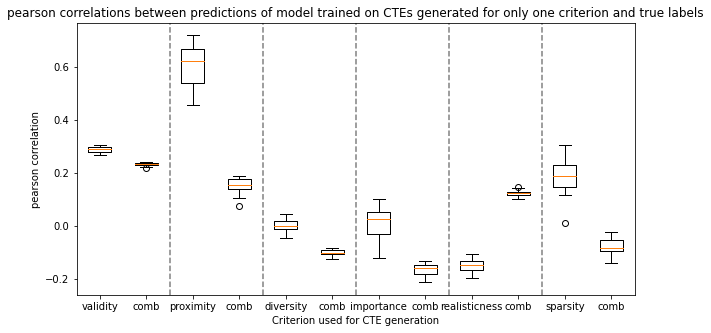

In [19]:
# boxplot
plt.figure(figsize=(10,5))
plt.boxplot([pearson_correlationsval, pearson_correlations_combinedval, pearson_correlationsprox, pearson_correlations_combinedprox, pearson_correlationsdiv, pearson_correlations_combineddiv, pearson_correlationscrit, pearson_correlations_combinedcrit, pearson_correlationsreal, pearson_correlations_combinedreal, pearson_correlationsspar, pearson_correlations_combinedspar])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['validity', 'comb', 'proximity', 'comb', 'diversity', 'comb', 'importance', 'comb', 'realisticness', 'comb', 'sparsity', 'comb'])
plt.ylabel('pearson correlation')
plt.xlabel('Criterion used for CTE generation')
plt.title('pearson correlations between predictions of model trained on CTEs generated for only one criterion and true labels')
for x in np.arange(2.5, 12, 2):
    plt.axvline(x,color='grey', ls='--')
plt.show()

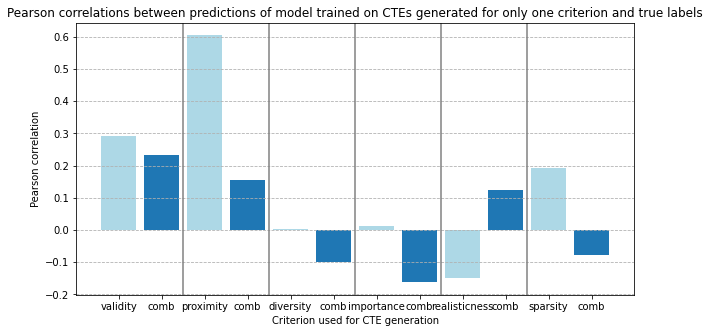

In [37]:
# plot with points
plt.figure(figsize=(10,5))
x = np.arange(1, 13)
plt.bar(x, [np.mean(pearson_correlationsval_oo), np.mean(pearson_correlations_combinedval_oo), np.mean(pearson_correlationsprox_oo), np.mean(pearson_correlations_combinedprox_oo), np.mean(pearson_correlationsdiv_oo), np.mean(pearson_correlations_combineddiv_oo), np.mean(pearson_correlationscrit_oo), np.mean(pearson_correlations_combinedcrit_oo), np.mean(pearson_correlationsreal_oo), np.mean(pearson_correlations_combinedreal_oo), np.mean(pearson_correlationsspar_oo), np.mean(pearson_correlations_combinedspar_oo)])
# make every second bar light blue
for i in np.arange(1, 13, 2):
    plt.bar(i, [np.mean(pearson_correlationsval_oo), np.mean(pearson_correlations_combinedval_oo), np.mean(pearson_correlationsprox_oo), np.mean(pearson_correlations_combinedprox_oo), np.mean(pearson_correlationsdiv_oo), np.mean(pearson_correlations_combineddiv_oo), np.mean(pearson_correlationscrit_oo), np.mean(pearson_correlations_combinedcrit_oo), np.mean(pearson_correlationsreal_oo), np.mean(pearson_correlations_combinedreal_oo), np.mean(pearson_correlationsspar_oo), np.mean(pearson_correlations_combinedspar_oo)][i-1], color='lightblue')
# plt.scatter(np.ones(len(pearson_correlationsval)), pearson_correlationsval, label='validity')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['validity', 'comb', 'proximity', 'comb', 'diversity', 'comb', 'importance', 'comb', 'realisticness', 'comb', 'sparsity', 'comb'])
plt.ylabel('Pearson correlation')
plt.xlabel('Criterion used for CTE generation')
plt.title('Pearson correlations between predictions of model trained on CTEs generated for only one criterion and true labels')
for x in np.arange(2.5, 12, 2):
    plt.axvline(x,color='grey', ls='-')
# add girdlines
plt.grid(axis='y', ls='--')
plt.show()

## Leave one out

In [6]:
# load the models
modelsval = load_linear_models('..\..\datasets\\1000_ablations\leave_one_out\\validity\\100\\results_sidebysideLM\80\saved_models', num_features)
modelsprox = load_linear_models('..\..\datasets\\1000_ablations\leave_one_out\proximity\\100\\results_sidebysideLM\80\saved_models', num_features)
modelsdiv = load_linear_models('..\..\datasets\\1000_ablations\leave_one_out\diversity\\100\\results_sidebysideLM\80\saved_models', num_features)
modelscrit = load_linear_models('..\..\datasets\\1000_ablations\leave_one_out\critical\\100\\results_sidebysideLM\80\saved_models', num_features)
modelsreal = load_linear_models('..\..\datasets\\1000_ablations\leave_one_out\\realisticness\\100\\results_sidebysideLM\80\saved_models', num_features)
modelsspar = load_linear_models('..\..\datasets\\1000_ablations\leave_one_out\sparsity\\100\\results_sidebysideLM\80\saved_models', num_features)

In [7]:
# load the test sets
with open('..\..\datasets\\1000_ablations\leave_one_out\\validity\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setval, test_labelsval = pkl.load(f)

with open('..\..\datasets\\1000_ablations\leave_one_out\proximity\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setprox, test_labelsprox = pkl.load(f)

with open('..\..\datasets\\1000_ablations\leave_one_out\diversity\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setdiv, test_labelsdiv = pkl.load(f)

with open('..\..\datasets\\1000_ablations\leave_one_out\critical\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setcrit, test_labelscrit = pkl.load(f)

with open('..\..\datasets\\1000_ablations\leave_one_out\\realisticness\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setreal, test_labelsreal = pkl.load(f)

with open('..\..\datasets\\1000_ablations\leave_one_out\sparsity\\100\\results_sidebysideLM\80\data_split.pkl', 'rb') as f:
    _, _, test_setspar, test_labelsspar = pkl.load(f)

with open('..\..\datasets\\1000_ablations\leave_one_out\combined_test_set.pkl', 'rb') as f:
    combined_test_set, combined_test_labels = pkl.load(f)

In [10]:
# make predictions on own data
test_lossesval, test_mean_errorsval, test_rmsesval, r2sval, pearson_correlationsval, spearman_correlationsval = test(modelsval, test_setval, test_labelsval)
test_lossesprox, test_mean_errorsprox, test_rmsesprox, r2sprox, pearson_correlationsprox, spearman_correlationsprox = test(modelsprox, test_setprox, test_labelsprox)
test_lossesdiv, test_mean_errorsdiv, test_rmsesdiv, r2sdiv, pearson_correlationsdiv, spearman_correlationsdiv = test(modelsdiv, test_setdiv, test_labelsdiv)
test_lossescrit, test_mean_errorscrit, test_rmsecrit, r2scrit, pearson_correlationscrit, spearman_correlationscrit = test(modelscrit, test_setcrit, test_labelscrit)
test_lossesreal, test_mean_errorsreal, test_rmsesreal, r2sreal, pearson_correlationsreal, spearman_correlationsreal = test(modelsreal, test_setreal, test_labelsreal)
test_lossesspar, test_mean_errorsspar, test_rmsesspar, r2sspar, pearson_correlationsspar, spearman_correlationsspar = test(modelsspar, test_setspar, test_labelsspar)

# make predictions on combined data
test_losses_combinedval, test_mean_errors_combinedval, test_rmses_combinedval, r2s_combinedval, pearson_correlations_combinedval, spearman_correlations_combinedval = test(modelsval, combined_test_set, combined_test_labels)
test_losses_combinedprox, test_mean_errors_combinedprox, test_rmses_combinedprox, r2s_combinedprox, pearson_correlations_combinedprox, spearman_correlations_combinedprox = test(modelsprox, combined_test_set, combined_test_labels)
test_losses_combineddiv, test_mean_errors_combineddiv, test_rmses_combineddiv, r2s_combineddiv, pearson_correlations_combineddiv, spearman_correlations_combineddiv = test(modelsdiv, combined_test_set, combined_test_labels)
test_losses_combinedcrit, test_mean_errors_combinedcrit, test_rmses_combinedcrit, r2s_combinedcrit, pearson_correlations_combinedcrit, spearman_correlations_combinedcrit = test(modelscrit, combined_test_set, combined_test_labels)
test_losses_combinedreal, test_mean_errors_combinedreal, test_rmses_combinedreal, r2s_combinedreal, pearson_correlations_combinedreal, spearman_correlations_combinedreal = test(modelsreal, combined_test_set, combined_test_labels)
test_losses_combinedspar, test_mean_errors_combinedspar, test_rmses_combinedspar, r2s_combinedspar, pearson_correlations_combinedspar, spearman_correlations_combinedspar = test(modelsspar, combined_test_set, combined_test_labels)

In [11]:
# Show results in a table
table = [
    ['measures'] + ['Without validity'] + ['Without proximity'] + ['Without diversity'] + ['Without critical'] + ['Without realisticness'] + ['Without sparsity'],
    ['rmse'] + [np.mean(test_rmsesval)] + [np.mean(test_rmsesprox)] + [np.mean(test_rmsesdiv)] + [np.mean(test_rmsecrit)] + [np.mean(test_rmsesreal)] + [np.mean(test_rmsesspar)],
    ['r2'] + [np.mean(r2sval)] + [np.mean(r2sprox)] + [np.mean(r2sdiv)] + [np.mean(r2scrit)] + [np.mean(r2sreal)] + [np.mean(r2sspar)],
    ['spearman'] + [np.mean(spearman_correlationsval)] + [np.mean(spearman_correlationsprox)] + [np.mean(spearman_correlationsdiv)] + [np.mean(spearman_correlationscrit)] + [np.mean(spearman_correlationsreal)] + [np.mean(spearman_correlationsspar)],
    ['------'] + ['------'] + ['------'] + ['------'] + ['------'] + ['------'] + ['------'],
    ['rmse combined'] + [np.mean(test_rmses_combinedval)] + [np.mean(test_rmses_combinedprox)] + [np.mean(test_rmses_combineddiv)] + [np.mean(test_rmses_combinedcrit)] + [np.mean(test_rmses_combinedreal)] + [np.mean(test_rmses_combinedspar)],
    ['r2 combined'] + [np.mean(r2s_combinedval)] + [np.mean(r2s_combinedprox)] + [np.mean(r2s_combineddiv)] + [np.mean(r2s_combinedcrit)] + [np.mean(r2s_combinedreal)] + [np.mean(r2s_combinedspar)],
    ['spearman combined'] + [np.mean(spearman_correlations_combinedval)] + [np.mean(spearman_correlations_combinedprox)] + [np.mean(spearman_correlations_combineddiv)] + [np.mean(spearman_correlations_combinedcrit)] + [np.mean(spearman_correlations_combinedreal)] + [np.mean(spearman_correlations_combinedspar)],
]

table_rounded = []
for row in table:
    rounded_row = []
    for val in row:
        if isinstance(val, float):
            rounded_row.append(round(val, 2))
        else:
            rounded_row.append(val)
    table_rounded.append(rounded_row)

print(tabulate(table_rounded, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lllllll}
\hline
 measures          & Without validity   & Without proximity   & Without diversity   & Without critical   & Without realisticness   & Without sparsity   \\
\hline
 rmse              & 1.51               & 3.67                & 2.89                & 2.73               & 10.62                   & 2.54               \\
 r2                & -1.45              & -1.22               & -1.32               & -0.93              & -40.92                  & -0.68              \\
 spearman          & 0.34               & 0.02                & 0.3                 & 0.4                & 0.15                    & 0.44               \\
 ------            & ------             & ------              & ------              & ------             & ------                  & ------             \\
 rmse combined     & 2.83               & 2.82                & 2.49                & 5.18               & 5.4                     & 2.33               \\
 r2 combined       & -1.23     

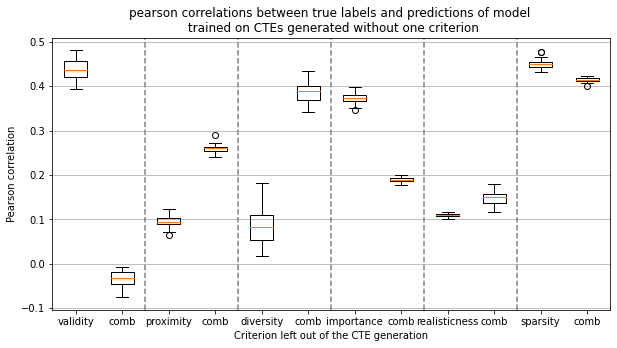

In [12]:
# boxplot
plt.figure(figsize=(10,5))
plt.boxplot([pearson_correlationsval, pearson_correlations_combinedval, pearson_correlationsprox, pearson_correlations_combinedprox, pearson_correlationsdiv, pearson_correlations_combineddiv, pearson_correlationscrit, pearson_correlations_combinedcrit, pearson_correlationsreal, pearson_correlations_combinedreal, pearson_correlationsspar, pearson_correlations_combinedspar])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['validity', 'comb', 'proximity', 'comb', 'diversity', 'comb', 'importance', 'comb', 'realisticness', 'comb', 'sparsity', 'comb'])
plt.ylabel('Pearson correlation')
plt.xlabel('Criterion left out of the CTE generation')
plt.title('pearson correlations between true labels and predictions of model \n trained on CTEs generated without one criterion')
for x in np.arange(2.5, 12, 2):
    plt.axvline(x,color='grey', ls='--')
# add girdlines
plt.grid(axis='y')
plt.show()

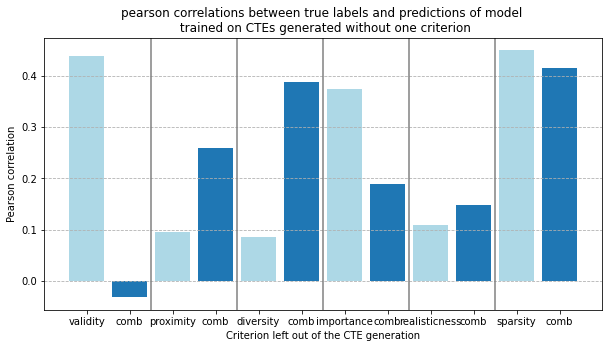

In [25]:
# plot with points
plt.figure(figsize=(10,5))
x = np.arange(1, 13)
plt.bar(x, [np.mean(pearson_correlationsval), np.mean(pearson_correlations_combinedval), np.mean(pearson_correlationsprox), np.mean(pearson_correlations_combinedprox), np.mean(pearson_correlationsdiv), np.mean(pearson_correlations_combineddiv), np.mean(pearson_correlationscrit), np.mean(pearson_correlations_combinedcrit), np.mean(pearson_correlationsreal), np.mean(pearson_correlations_combinedreal), np.mean(pearson_correlationsspar), np.mean(pearson_correlations_combinedspar)])
# make every second bar light blue
for i in np.arange(1, 13, 2):
    plt.bar(i, [np.mean(pearson_correlationsval), np.mean(pearson_correlations_combinedval), np.mean(pearson_correlationsprox), np.mean(pearson_correlations_combinedprox), np.mean(pearson_correlationsdiv), np.mean(pearson_correlations_combineddiv), np.mean(pearson_correlationscrit), np.mean(pearson_correlations_combinedcrit), np.mean(pearson_correlationsreal), np.mean(pearson_correlations_combinedreal), np.mean(pearson_correlationsspar), np.mean(pearson_correlations_combinedspar)][i-1], color='lightblue')
# plt.scatter(np.ones(len(pearson_correlationsval)), pearson_correlationsval, label='validity')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['validity', 'comb', 'proximity', 'comb', 'diversity', 'comb', 'importance', 'comb', 'realisticness', 'comb', 'sparsity', 'comb'])
plt.ylabel('Pearson correlation')
plt.xlabel('Criterion left out of the CTE generation')
plt.title('pearson correlations between true labels and predictions of model \n trained on CTEs generated without one criterion')
for x in np.arange(2.5, 12, 2):
    plt.axvline(x,color='grey', ls='-')
# add girdlines
plt.grid(axis='y', ls='--')
plt.show()

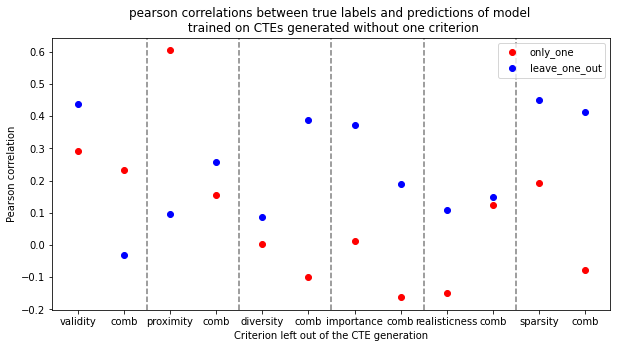

In [21]:
# plot with points
plt.figure(figsize=(10,5))
x = np.arange(1, 13)
plt.scatter(x, [np.mean(pearson_correlationsval_oo), np.mean(pearson_correlations_combinedval_oo), np.mean(pearson_correlationsprox_oo), np.mean(pearson_correlations_combinedprox_oo), np.mean(pearson_correlationsdiv_oo), np.mean(pearson_correlations_combineddiv_oo), np.mean(pearson_correlationscrit_oo), np.mean(pearson_correlations_combinedcrit_oo), np.mean(pearson_correlationsreal_oo), np.mean(pearson_correlations_combinedreal_oo), np.mean(pearson_correlationsspar_oo), np.mean(pearson_correlations_combinedspar_oo)], color='red', label='only_one')
plt.scatter(x, [np.mean(pearson_correlationsval), np.mean(pearson_correlations_combinedval), np.mean(pearson_correlationsprox), np.mean(pearson_correlations_combinedprox), np.mean(pearson_correlationsdiv), np.mean(pearson_correlations_combineddiv), np.mean(pearson_correlationscrit), np.mean(pearson_correlations_combinedcrit), np.mean(pearson_correlationsreal), np.mean(pearson_correlations_combinedreal), np.mean(pearson_correlationsspar), np.mean(pearson_correlations_combinedspar)], color='blue', label='leave_one_out')
# plt.scatter(np.ones(len(pearson_correlationsval)), pearson_correlationsval, label='validity')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['validity', 'comb', 'proximity', 'comb', 'diversity', 'comb', 'importance', 'comb', 'realisticness', 'comb', 'sparsity', 'comb'])
plt.ylabel('Pearson correlation')
plt.xlabel('Criterion left out of the CTE generation')
plt.title('pearson correlations between true labels and predictions of model \n trained on CTEs generated without one criterion')
for x in np.arange(2.5, 12, 2):
    plt.axvline(x,color='grey', ls='--')
# add girdlines
# plt.grid(axis='y')
plt.legend()
plt.show()